## Importação de bibliotecas e extração dos dados

In [2]:
import pandas as pd
import deslib
import pymfe

In [3]:
file_names = ["mfeat-fac", "mfeat-fou", "mfeat-kar", "mfeat-mor", "mfeat-pix", "mfeat-zer"]
dataset_names = [x.replace("-","_") for x in file_names]

mfeat_fac = pd.read_csv("mfeat-fac.csv",delim_whitespace=True,header=None)
mfeat_fou = pd.read_csv("mfeat-fou.csv",delim_whitespace=True,header=None)
mfeat_kar = pd.read_csv("mfeat-kar.csv",delim_whitespace=True,header=None)
mfeat_mor = pd.read_csv("mfeat-mor.csv",delim_whitespace=True,header=None)
mfeat_pix = pd.read_csv("mfeat-pix.csv",delim_whitespace=True,header=None)
mfeat_zer = pd.read_csv("mfeat-zer.csv",delim_whitespace=True,header=None)

In [4]:
mfeat_fac.shape, mfeat_fou.shape, mfeat_kar.shape, mfeat_mor.shape, mfeat_pix.shape, mfeat_zer.shape

((2000, 216), (2000, 76), (2000, 64), (2000, 6), (2000, 240), (2000, 47))

In [5]:
for item in mfeat_mor.columns:
    print(item, mfeat_mor[item].value_counts())

0 0.0    1207
1.0     601
2.0     192
Name: 0, dtype: int64
1 2.0    651
3.0    494
1.0    398
0.0    387
4.0     67
6.0      2
5.0      1
Name: 1, dtype: int64
2 1.0    889
0.0    846
2.0    260
3.0      3
5.0      1
4.0      1
Name: 2, dtype: int64
3 130.578861    6
137.616861    4
144.994861    4
133.920861    4
131.934861    3
             ..
132.382861    1
223.296861    1
124.384861    1
194.474861    1
132.273861    1
Name: 3, Length: 1717, dtype: int64
4 1.564621    4
1.555376    2
1.464837    2
1.669421    2
1.556284    2
           ..
1.723905    1
1.938348    1
1.969993    1
1.456876    1
1.514323    1
Name: 4, Length: 1886, dtype: int64
5 3808.021317     4
3870.753021     2
4073.644988     2
3078.477817     2
3737.864996     2
               ..
2108.481483     1
6946.219021     1
13225.580607    1
9915.456060     1
1777.753184     1
Name: 5, Length: 1888, dtype: int64


In [6]:
print("--------------------")
for item in mfeat_mor.columns:
    data = []
    for datavalue in mfeat_mor[item]:
        data.append(type(datavalue))
    data = pd.Series(data)

    print(data.value_counts())

--------------------
<class 'float'>    2000
dtype: int64
<class 'float'>    2000
dtype: int64
<class 'float'>    2000
dtype: int64
<class 'float'>    2000
dtype: int64
<class 'float'>    2000
dtype: int64
<class 'float'>    2000
dtype: int64


#### In each file the 2000 patterns are stored in ASCI on 2000 lines. The first 200 patterns are of class '0', followed by sets of 200 patterns for each of the classes '1' - '9'. Corresponding patterns in different feature sets (files) correspond to the same original character.

In [7]:
y_data = []
for _ in range(10): # Para cada uma das classes
    for item in range(200): # Para cada uma das instâncias
        y_data.append(str(_))

len(y_data)

2000

## Extração de métricas de complexidade de apenas um dataset

In [8]:
from pymfe.mfe import MFE
import numpy as np

mfe = MFE(groups = ['complexity'])
mfe.fit(mfeat_fac.values,y_data)
ft = mfe.extract()
print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

c:\Users\Victor\AppData\Local\Programs\Python\Python38-32\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Victor\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pymfe\_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")


c1                                                             0.9999999999999998
c2                                                                            0.0
cls_coef                                                      0.11600217184875994
density                                                        0.9216868434217108
f1.mean                                                        0.5114091458342185
f1.sd                                                         0.13935389439021795
f1v.mean                                                      0.00196903563604571
f1v.sd                                                      0.0014954935763594405
f2.mean                                                     9.496172542333211e-26
f2.sd                                                       6.369028416817056e-25
f3.mean                                                        1.3390555555555557
f3.sd                                                           0.781719638639291
f4.mean         

In [9]:
complexity_metrics = {}
for x, y in zip(ft[0], ft[1]):
    complexity_metrics[x] = y

In [10]:
complexity_metrics

{'c1': 0.9999999999999998,
 'c2': 0.0,
 'cls_coef': 0.11600217184875994,
 'density': 0.9216868434217108,
 'f1.mean': 0.5114091458342185,
 'f1.sd': 0.13935389439021795,
 'f1v.mean': 0.00196903563604571,
 'f1v.sd': 0.0014954935763594405,
 'f2.mean': 9.496172542333211e-26,
 'f2.sd': 6.369028416817056e-25,
 'f3.mean': 1.3390555555555557,
 'f3.sd': 0.781719638639291,
 'f4.mean': 0.0,
 'f4.sd': 0.0,
 'hubs.mean': 0.9046277635464075,
 'hubs.sd': 0.2887547966667681,
 'l1.mean': 0.0,
 'l1.sd': 0.0,
 'l2.mean': 0.0,
 'l2.sd': 0.0,
 'l3.mean': 0.0,
 'l3.sd': 0.0,
 'lsc': 0.97989775,
 'n1': 0.0845,
 'n2.mean': 0.36504967135251254,
 'n2.sd': 0.07695765811750134,
 'n3.mean': 0.0405,
 'n3.sd': 0.1971780657040671,
 'n4.mean': 0.004,
 'n4.sd': 0.06313472100594292,
 't1': 0.505,
 't2': 0.108,
 't3': 0.006,
 't4': 0.05555555555555555}

# Extração de métricas de complexidade de todos os datasets

In [11]:
#y_data = np.array(y_data)

In [12]:
sets = [mfeat_fac, mfeat_fou, mfeat_kar, mfeat_mor, mfeat_pix, mfeat_zer]

# instanciar uma estrutura que armazena valores de complexidade

complexity = {"Dimensionality":[],
    #"c1":[], # Entropy of Class proportions
           #"c2":[], # Imbalance ratio, também adaptada para problemas multiclasse
           "f1.mean":[], # Fisher's Discriminant Ratio
           "f2.mean":[], # Volume of Overlapping Region
           "l1.mean":[], # Sum of the error istance by Linear Programming (SVM optimization)
           "l2.mean":[], # Error rate of the linear classifier (SVM)
           "l3.mean":[], # Non-linearity of a Linear Classifier
           "n1":[], # Fraction of borderline points
           "n2.mean":[], # Ratio of intra and extra class nearest neighbor distance
           "n3.mean":[] # Ratio of intra and extra class nearest neighbor distance.
        }

dataset_labels = ['mfeat_fac', 'mfeat_fou', 'mfeat_kar', 'mfeat_mor', 'mfeat_pix', 'mfeat_zer']

for dataset, label in zip(sets,dataset_labels):
    # calcular complexidade de cada dataset
    print('--------------',label,'-----------------')
    mfe = MFE(groups = ['complexity'])
    mfe.fit(dataset.values,y_data)
    ft = mfe.extract()

    dataset_complexity_measures = {}
    for x, y in zip(ft[0], ft[1]):
        dataset_complexity_measures[x] = y
    #armazenar valores de interesse do seu dataset

    complexity["Dimensionality"].append(dataset.shape[1])

    for metafeature in ['f1.mean','f2.mean','l1.mean','l2.mean','l3.mean','n1','n2.mean','n3.mean']:
        complexity[metafeature].append(dataset_complexity_measures[metafeature])


-------------- mfeat_fac -----------------


c:\Users\Victor\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pymfe\_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")


-------------- mfeat_fou -----------------
-------------- mfeat_kar -----------------
-------------- mfeat_mor -----------------


c:\Users\Victor\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pymfe\_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")
c:\Users\Victor\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pymfe\complexity.py:990: RuntimeWarning: invalid value encountered in true_divide
  f2[ind] = np.prod(np.maximum(0.0, minmax - maxmin) / (maxmax - minmin))
c:\Users\Victor\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pymfe\_internal.py:731: RuntimeWarning: Can't summarize feature 'f2' with summary 'sd'. Will set it as 'np.nan'.
  warnings.warn(
c:\Users\Victor\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pymfe\_internal.py:731: RuntimeWarning: Can't summarize feature 'f2' with summary 'mean'. Will set it as 'np.nan'.
  warnings.warn(
c:\Users\Victor\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pymfe\complexity.py:1742: RuntimeWarning: divide by zer

-------------- mfeat_pix -----------------


c:\Users\Victor\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pymfe\_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")
c:\Users\Victor\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pymfe\complexity.py:990: RuntimeWarning: invalid value encountered in true_divide
  f2[ind] = np.prod(np.maximum(0.0, minmax - maxmin) / (maxmax - minmin))
c:\Users\Victor\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pymfe\_internal.py:731: RuntimeWarning: Can't summarize feature 'f2' with summary 'sd'. Will set it as 'np.nan'.
  warnings.warn(
c:\Users\Victor\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pymfe\_internal.py:731: RuntimeWarning: Can't summarize feature 'f2' with summary 'mean'. Will set it as 'np.nan'.
  warnings.warn(


-------------- mfeat_zer -----------------


In [13]:
complexity

{'Dimensionality': [216, 76, 64, 6, 240, 47],
 'f1.mean': [0.5114091458342185,
  0.7629594309785904,
  0.7614981963376197,
  0.17870763635764195,
  0.6364311392285728,
  0.6255584110882542],
 'f2.mean': [9.496172542333211e-26,
  5.052475763381846e-06,
  2.7342828762484974e-08,
  nan,
  nan,
  0.005288058022137935],
 'l1.mean': [0.0,
  0.0032863730334751454,
  0.0,
  0.026361777139687848,
  0.0,
  0.005905400245165919],
 'l2.mean': [0.0,
  0.004444444444444441,
  0.0,
  0.03838888888888888,
  0.0,
  0.01105555555555555],
 'l3.mean': [0.0,
  0.014833333333333334,
  0.0013888888888888766,
  0.03805555555555555,
  0.0,
  0.022499999999999996],
 'n1': [0.0845, 0.2995, 0.081, 0.413, 0.0625, 0.295],
 'n2.mean': [0.36504967135251254,
  0.4401776010348133,
  0.4132357341024008,
  nan,
  0.3630857884481563,
  0.47611097204974856],
 'n3.mean': [0.0405, 0.197, 0.0385, 0.3395, 0.027, 0.221]}

### Modificação da métrica C1 (há um erro na documentação)

In [14]:
#complexity["c1"] = [-2*(item - 1) for item in complexity["c1"]]

In [15]:
datasets_dim = complexity["Dimensionality"]
dataset_labels = [x + "_" + str(y) for x, y in zip(dataset_labels,datasets_dim)]

data = pd.DataFrame(complexity, index = dataset_labels)

data.drop(columns = "Dimensionality",inplace=True)



In [16]:
data

,f1.mean,f2.mean,l1.mean,l2.mean,l3.mean,n1,n2.mean,n3.mean
mfeat_fac_216,0.511409,9.496173e-26,0.000000,0.000000,0.000000,0.0845,0.365050,0.0405
mfeat_fou_76,0.762959,5.052476e-06,0.003286,0.004444,0.014833,0.2995,0.440178,0.1970
mfeat_kar_64,0.761498,2.734283e-08,0.000000,0.000000,0.001389,0.0810,0.413236,0.0385
mfeat_mor_6,0.178708,NaN,0.026362,0.038389,0.038056,0.4130,NaN,0.3395
mfeat_pix_240,0.636431,NaN,0.000000,0.000000,0.000000,0.0625,0.363086,0.0270
mfeat_zer_47,0.625558,5.288058e-03,0.005905,0.011056,0.022500,0.2950,0.476111,0.2210


In [17]:
# Identificar o dataset mais complexo de acordo com alguma medida de complexidade

for key in data.keys():
    measure_list = data[key]
    if not any(measure_list.isna()):
        index = 0    #ind variable to store the index of maximum value in the list
        max_measure = measure_list[0]

        for i in range (1,len(measure_list)): #iterate over array
          if measure_list[i] > max_measure: #to check max value
            max_measure = measure_list[i]
            index = i
        
        print(key, index)

f1.mean 1
l1.mean 3
l2.mean 3
l3.mean 3
n1 3
n3.mean 3


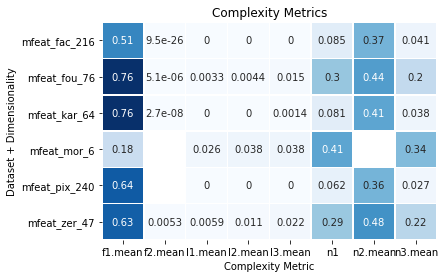

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns


# Disposição em diagramas do tipo heatmap
ax = sns.heatmap(data,
                 annot=True,
                 cbar=False,
                 cmap="Blues",
                 xticklabels=True,
                 yticklabels=True,
                 linewidth=.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.title("Complexity Metrics")
plt.xlabel("Complexity Metric")
plt.ylabel("Dataset + Dimensionality")
plt.show()

data.to_csv("complexity.csv")

In [19]:
# Planos:
# Fazer um esquema de DES para as visões
# Fazer um esquema de modelos monlíticos para as visões
# Construir uma etapa de generalização em pilha para agregação (lmao se vira)
## para cada view, extrair as saídas correspondentes
## Treinar um "meta-modelo" para ajustar as saídas à clçasse predita corretamente (será?)
# 
# 

## Aplicação de modelos DCS e Ensemble

#### Funções para aprendizado

In [20]:
from sklearn.model_selection import train_test_split
from deslib.des import METADES
from deslib.des import KNORAE

# Split primeiro, treinamento depois


def split_data_ensembles(X, y, rng = 42):
      # Testando a abordagem DES para somente uma visão

      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                          random_state=rng)

      # Train data splitting into Training and Domains of Competence (dsel) sets
      X_train, X_dsel, y_train, y_dsel = train_test_split(X_train, y_train,
                                                          test_size=0.5,
                                                          random_state=rng)
      
      return X_train, X_test, X_dsel, y_train, y_test, y_dsel



def ensemble_KNORA(X_train, 
                   X_test, 
                   X_dsel, 
                   y_train, 
                   y_test, 
                   y_dsel, 
                   rng = 42):
      
      # Testando a abordagem DES para somente uma visão

      kne = KNORAE(random_state=rng)

      kne.fit(X_dsel, y_dsel)
      # VERIFICAR DEPOIS O QUE PRECISA FAZER COM X_TRAIN E Y_TRAIN
      score = kne.score(X_test, y_test)
      predictions = kne.predict(X_test)

      # Verify prediction accuracy
      #print(sum([x == y for x,y in zip(predictions, y_test)])/len(y_test))

      # Calculate classification accuracy of each technique
      print('Classification accuracy KNORA-Eliminate: ',
            score)
      return predictions, score

def ensemble_META_DES(X_train, 
                      X_test, 
                      X_dsel, 
                      y_train, 
                      y_test, 
                      y_dsel, 
                      rng = 42):
      
      # Testando a abordagem DES para somente uma visão

      meta = METADES(random_state=rng)

      meta.fit(X_dsel, y_dsel)
      # VERIFICAR DEPOIS O QUE PRECISA FAZER COM X_TRAIN E Y_TRAIN
      score = meta.score(X_test, y_test)
      predictions = meta.predict(X_test)

      # Calculate classification accuracy of each technique
      print('Classification accuracy META-DES: ', score)
      return predictions, score


In [21]:
# Para cada dataset, fazer um aprendizado por KNORA e por META_DES e coletar os outputs
# Pra fazer um modelo em pilha pra integração das views

sets = [mfeat_fac, mfeat_fou, mfeat_kar, mfeat_mor, mfeat_pix, mfeat_zer]

dataset_labels = ['mfeat_fac', 'mfeat_fou', 'mfeat_kar', 'mfeat_mor', 'mfeat_pix', 'mfeat_zer']

knora_outputs = {}
meta_des_outputs = {}

# Array para verificar a consistência dos dados de teste - não precisa mais
y_test_arrays = {}

scores_knora = {}
scores_meta_des = {}

for X, name in zip (sets,dataset_labels):
    X_train, X_test, X_dsel, y_train, y_test, y_dsel = split_data_ensembles(X, y_data)
    print("Dataset:",name)
    X_predict_knora, knora_score = ensemble_KNORA(X_train, X_test, X_dsel, y_train, y_test, y_dsel)
    X_predict_meta_des, meta_des_score = ensemble_META_DES(X_train, X_test, X_dsel, y_train, y_test, y_dsel)
    #assert(y_test_1 == y_test_2)
    #assert(target_data == y_test_1)
    print("----------------------------")
    knora_outputs[name] = X_predict_knora
    meta_des_outputs[name] = X_predict_meta_des
    scores_knora[name] = knora_score
    scores_meta_des[name] = meta_des_score

    y_test_arrays[name] = y_test



knora_outputs['target'] = y_test
meta_des_outputs['target'] = y_test

Dataset: mfeat_fac


c:\Users\Victor\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\numeric.py:2327: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


Classification accuracy KNORA-Eliminate:  0.8469696969696969


c:\Users\Victor\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\numeric.py:2327: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


Classification accuracy META-DES:  0.9045454545454545
----------------------------
Dataset: mfeat_fou


c:\Users\Victor\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\numeric.py:2327: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


Classification accuracy KNORA-Eliminate:  0.6893939393939394


c:\Users\Victor\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\numeric.py:2327: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


Classification accuracy META-DES:  0.7075757575757575
----------------------------
Dataset: mfeat_kar


c:\Users\Victor\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\numeric.py:2327: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


Classification accuracy KNORA-Eliminate:  0.7787878787878788


c:\Users\Victor\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\numeric.py:2327: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


Classification accuracy META-DES:  0.7924242424242425
----------------------------
Dataset: mfeat_mor


c:\Users\Victor\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\numeric.py:2327: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


Classification accuracy KNORA-Eliminate:  0.6439393939393939


c:\Users\Victor\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\numeric.py:2327: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


Classification accuracy META-DES:  0.693939393939394
----------------------------
Dataset: mfeat_pix


c:\Users\Victor\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\numeric.py:2327: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


Classification accuracy KNORA-Eliminate:  0.8787878787878788


c:\Users\Victor\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\numeric.py:2327: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


Classification accuracy META-DES:  0.9015151515151515
----------------------------
Dataset: mfeat_zer


c:\Users\Victor\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\numeric.py:2327: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


Classification accuracy KNORA-Eliminate:  0.6909090909090909


c:\Users\Victor\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\numeric.py:2327: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


Classification accuracy META-DES:  0.7212121212121212
----------------------------


In [22]:
y_test_arrays = pd.DataFrame(y_test_arrays)
y_test_arrays

,mfeat_fac,mfeat_fou,mfeat_kar,mfeat_mor,mfeat_pix,mfeat_zer
0,9,9,9,9,9,9
1,1,1,1,1,1,1
2,6,6,6,6,6,6
3,4,4,4,4,4,4
4,6,6,6,6,6,6
...,...,...,...,...,...,...
655,0,0,0,0,0,0
656,6,6,6,6,6,6
657,9,9,9,9,9,9
658,2,2,2,2,2,2


### Construção de datasets sintéticos para generalização em pilha

In [23]:
knora_df = pd.DataFrame(knora_outputs)
knora_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   mfeat_fac  660 non-null    object
 1   mfeat_fou  660 non-null    object
 2   mfeat_kar  660 non-null    object
 3   mfeat_mor  660 non-null    object
 4   mfeat_pix  660 non-null    object
 5   mfeat_zer  660 non-null    object
 6   target     660 non-null    object
dtypes: object(7)
memory usage: 18.1+ KB


In [24]:
meta_des_df = pd.DataFrame(meta_des_outputs)
meta_des_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   mfeat_fac  660 non-null    object
 1   mfeat_fou  660 non-null    object
 2   mfeat_kar  660 non-null    object
 3   mfeat_mor  660 non-null    object
 4   mfeat_pix  660 non-null    object
 5   mfeat_zer  660 non-null    object
 6   target     660 non-null    object
dtypes: object(7)
memory usage: 18.1+ KB


### Generalização em pilha KNORA

In [25]:
from sklearn import svm
#clf = svm.SVC(decision_function_shape='ovo')

# ovo = one versus one
# ovr = one versus rest (one vs all)
dataset = knora_df

X, y = dataset.drop(columns="target"), dataset["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                      random_state=42)
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
score = clf.score(X_test,y_test)
print(score)


scores_knora["stacked"] = score

0.7889908256880734


### Generalização em pilha META-DES

In [26]:
dataset = meta_des_df

X, y = dataset.drop(columns="target"), dataset["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                      random_state=42)
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
score = clf.score(X_test,y_test)
print(score)

scores_meta_des["stacked"] = score

0.8394495412844036


In [27]:
scores_knora

{'mfeat_fac': 0.8469696969696969,
 'mfeat_fou': 0.6893939393939394,
 'mfeat_kar': 0.7787878787878788,
 'mfeat_mor': 0.6439393939393939,
 'mfeat_pix': 0.8787878787878788,
 'mfeat_zer': 0.6909090909090909,
 'stacked': 0.7889908256880734}

In [28]:
scores_meta_des

{'mfeat_fac': 0.9045454545454545,
 'mfeat_fou': 0.7075757575757575,
 'mfeat_kar': 0.7924242424242425,
 'mfeat_mor': 0.693939393939394,
 'mfeat_pix': 0.9015151515151515,
 'mfeat_zer': 0.7212121212121212,
 'stacked': 0.8394495412844036}

## Generalização em pilha eliminando a visão mais complexa

In [29]:
for key in data.keys():
    measure_list = data[key]
    if not any(measure_list.isna()):
        index = 0    #ind variable to store the index of maximum value in the list
        max_measure = measure_list[0]

        for i in range (1,len(measure_list)): #iterate over array
          if measure_list[i] > max_measure: #to check max value
            max_measure = measure_list[i]
            index = i
        
        print(key, index, dataset_labels[index])

f1.mean 1 mfeat_fou
l1.mean 3 mfeat_mor
l2.mean 3 mfeat_mor
l3.mean 3 mfeat_mor
n1 3 mfeat_mor
n3.mean 3 mfeat_mor


In [30]:
knora_df

,mfeat_fac,mfeat_fou,mfeat_kar,mfeat_mor,mfeat_pix,mfeat_zer,target
0,9,9,9,6,9,5,9
1,1,1,1,4,1,1,1
2,6,6,6,9,6,6,6
3,4,4,4,7,2,4,4
4,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...
655,0,0,0,0,0,0,0
656,6,9,4,6,6,6,6
657,9,8,0,6,9,9,9
658,2,1,2,6,2,2,2


#### Eliminando o dataset mfeat_fou

In [31]:
dataset = knora_df.drop(columns = "mfeat_fou")

X, y = dataset.drop(columns="target"), dataset["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                      random_state=42)
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
score = clf.score(X_test,y_test)
print(score)

scores_knora["stacked_drop_fou"] = score

0.7889908256880734


In [32]:
dataset = meta_des_df.drop(columns = "mfeat_fou")

X, y = dataset.drop(columns="target"), dataset["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                      random_state=42)
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
score = clf.score(X_test,y_test)
print(score)

scores_meta_des["stacked_drop_fou"] = score

0.8532110091743119


### Eliminando o dataset mfeat_mor

In [33]:
dataset = knora_df.drop(columns = "mfeat_fou")

X, y = dataset.drop(columns="target"), dataset["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                      random_state=42)
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
score = clf.score(X_test,y_test)
print(score)

scores_knora["stacked_drop_mor"] = score

0.7889908256880734


In [34]:
dataset = meta_des_df.drop(columns = "mfeat_fou")

X, y = dataset.drop(columns="target"), dataset["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                      random_state=42)
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
score = clf.score(X_test,y_test)
print(score)

scores_meta_des["stacked_drop_mor"] = score

0.8532110091743119


In [35]:
scores_knora

{'mfeat_fac': 0.8469696969696969,
 'mfeat_fou': 0.6893939393939394,
 'mfeat_kar': 0.7787878787878788,
 'mfeat_mor': 0.6439393939393939,
 'mfeat_pix': 0.8787878787878788,
 'mfeat_zer': 0.6909090909090909,
 'stacked': 0.7889908256880734,
 'stacked_drop_fou': 0.7889908256880734,
 'stacked_drop_mor': 0.7889908256880734}

In [39]:
type(scores_meta_des)

dict

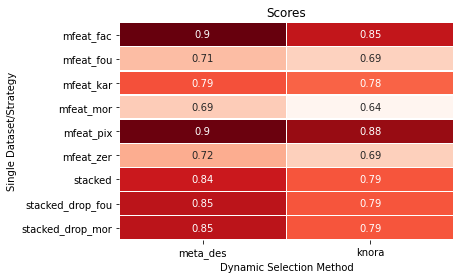

In [53]:
results_DES = pd.concat([pd.DataFrame(list(scores_meta_des.values()), 
                                     index = scores_meta_des.keys(),
                                     columns = ["meta_des"]),
                        pd.DataFrame(list(scores_knora.values()), 
                                     index = scores_knora.keys(),
                                     columns = ["knora"])],
                        axis = 1)

# Disposição em diagramas do tipo heatmap
ax = sns.heatmap(results_DES,
                 annot=True,
                 cbar=False,
                 cmap="Reds",
                 xticklabels=True,
                 yticklabels=True,
                 linewidth=.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.title("Scores")
plt.xlabel("Dynamic Selection Method")
plt.ylabel("Single Dataset/Strategy")
plt.show()

results_DES.to_csv("scores.csv")

In [40]:
results_DES = pd.concat(pd.DataFrame(scores_meta_des),pd.DataFrame(scores_knora), axis = 1)

ValueError: If using all scalar values, you must pass an index

In [ ]:
dataset = meta_des_df.drop(columns = "mfeat_fou")
dataset

,mfeat_fac,mfeat_kar,mfeat_mor,mfeat_pix,mfeat_zer,target
0,9,9,9,9,6,9
1,1,1,1,1,1,1
2,6,4,6,6,6,6
3,4,2,4,8,4,4
4,6,6,9,6,4,6
...,...,...,...,...,...,...
655,0,0,0,0,0,0
656,6,4,6,6,9,6
657,8,9,6,9,9,9
658,2,2,6,2,2,2


#### Datasets sintéticos dos perfis de saída para cada visão, em relação ao ground truth (y_test)

In [ ]:
output_profiles_meta_des = {}

for label in dataset_labels:
    output = meta_des_df[label]
    target = meta_des_df["target"]
    profile = [int(x == y) for x, y in zip (output,target)]
    output_profiles_meta_des[label] = profile

output_profiles_meta_des["target"] = meta_des_df["target"]

#for key in output_profiles_meta_des.keys():
#    print(sum(output_profiles_meta_des[key])/len(output_profiles_meta_des[key]))

In [ ]:
#from pycol.complexity import Complexity
#import numpy as np
#import seaborn as sns
#sns.set_style("darkgrid")
#
#iris = sns.load_dataset('iris')
#iris.head()

In [45]:
scores_meta_des.values()

dict_values([0.9045454545454545, 0.7075757575757575, 0.7924242424242425, 0.693939393939394, 0.9015151515151515, 0.7212121212121212, 0.8394495412844036, 0.8532110091743119, 0.8532110091743119])

In [47]:
xxxxxx = pd.DataFrame(list(scores_meta_des.values()), index = scores_meta_des.keys())
xxxxxx.head()

,0
mfeat_fac,0.904545
mfeat_fou,0.707576
mfeat_kar,0.792424
mfeat_mor,0.693939
mfeat_pix,0.901515
